In [1]:
import cv2,os

data_path='Vedic dataset'


In [2]:
categories=os.listdir(data_path)



In [3]:
print(str(categories[1]))

Vedic worshipping  device


In [78]:
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) 

print(label_dict)
print(categories)
print(labels)

{'Vedic symbols': 0, 'Vedic worshipping  device': 1}
['Vedic symbols', 'Vedic worshipping  device']
[0, 1]


In [79]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
           
            resized=cv2.resize(gray,(img_size,img_size))
          
            data.append(resized)
            target.append(label_dict[category])
           
        except Exception as e:
            print('Exception:',e)

In [80]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

In [83]:
np.save('data',data)
np.save('target',new_target)

In [84]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [85]:


from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dropout(0.6))

model.add(Dense(50,activation='relu'))

model.add(Dense(2,activation='softmax'))


model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])



In [86]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [87]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=12,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/12
45/45 [==============================] - 45s 999ms/step - loss: 0.6816 - accuracy: 0.5580 - val_loss: 0.6068 - val_accuracy: 0.6742
Epoch 2/12
45/45 [==============================] - 46s 1s/step - loss: 0.5787 - accuracy: 0.6908 - val_loss: 0.5444 - val_accuracy: 0.7247
Epoch 3/12
45/45 [==============================] - 46s 1s/step - loss: 0.5320 - accuracy: 0.7196 - val_loss: 0.5414 - val_accuracy: 0.6966
Epoch 4/12
45/45 [==============================] - 46s 1s/step - loss: 0.5157 - accuracy: 0.7393 - val_loss: 0.4992 - val_accuracy: 0.7725
Epoch 5/12
45/45 [==============================] - 45s 998ms/step - loss: 0.4695 - accuracy: 0.7583 - val_loss: 0.6515 - val_accuracy: 0.6545
Epoch 6/12
45/45 [==============================] - 45s 997ms/step - loss: 0.4401 - accuracy: 0.7786 - val_loss: 0.5141 - val_accuracy: 0.7640
Epoch 7/12
45/45 [==============================] - 47s 1s/step - loss: 0.3847 - accuracy: 0.8264 - val_loss: 0.4370 - val_accuracy: 0.7865
Epoch 8/12


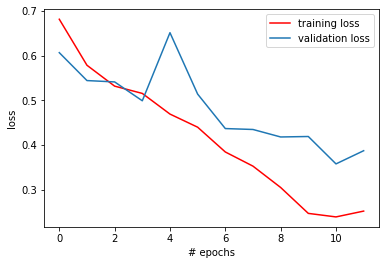

In [88]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [89]:
print(model.evaluate(test_data,test_target))

7/7 [==============================] - 1s 193ms/step - loss: 0.4085 - accuracy: 0.8232
[0.40852001309394836, 0.8232323527336121]
